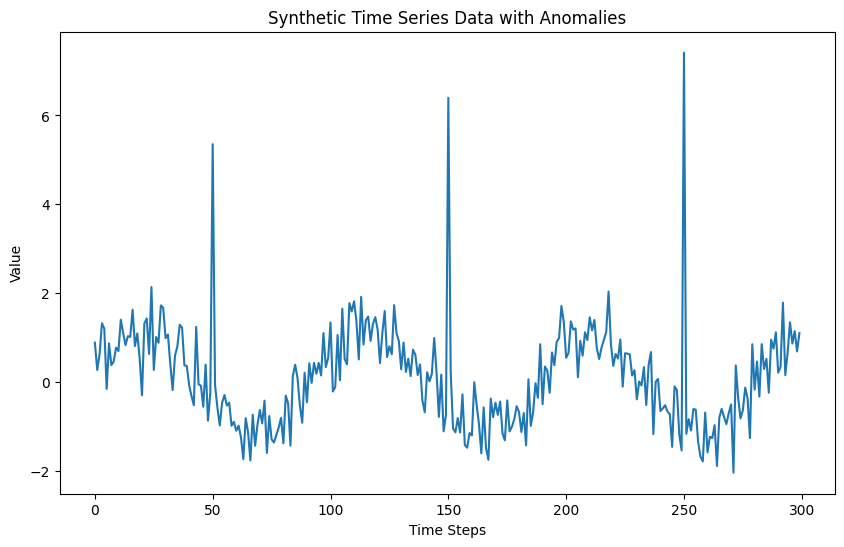

Epoch 10, Loss: 1.3768160343170166
Epoch 20, Loss: 1.3581370115280151
Epoch 30, Loss: 1.3418694734573364
Epoch 40, Loss: 1.329002857208252
Epoch 50, Loss: 1.318238615989685
Epoch 60, Loss: 1.3078875541687012
Epoch 70, Loss: 1.2955026626586914
Epoch 80, Loss: 1.2797085046768188
Epoch 90, Loss: 1.2633670568466187
Epoch 100, Loss: 1.247807502746582


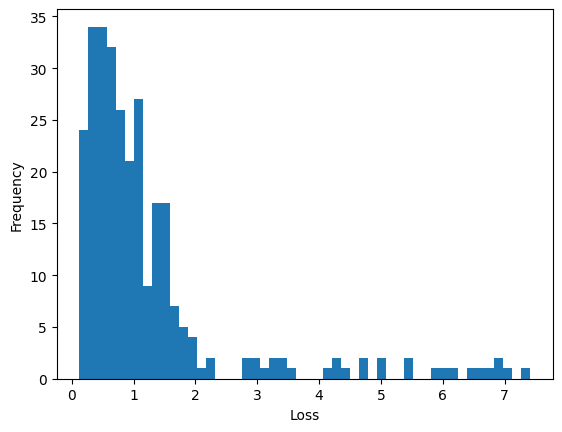

Anomaly threshold: 4.022599220275879
Anomalies found at positions: [141 142 143 144 145 146 147 148 149 150 241 242 243 244 245 246 247 248
 249 250]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic time-series data
data_length = 300
data = np.sin(np.linspace(0, 20, data_length)) + np.random.normal(scale=0.5, size=data_length)
# Introduce anomalies
data[50] += 6  # Anomaly 1
data[150] += 7 # Anomaly 2
data[250] += 8 # Anomaly 3

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Synthetic Time Series Data with Anomalies")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()

# Function to create sequences
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 10
sequences = create_sequences(data, window_size)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(window_size, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, window_size),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Convert sequences to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(sequences)
    loss = criterion(output, sequences)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Anomaly detection
with torch.no_grad():
    predictions = model(sequences)
    losses = torch.mean((predictions - sequences)**2, dim=1)
    plt.hist(losses.numpy(), bins=50)
    plt.xlabel("Loss")
    plt.ylabel("Frequency")
    plt.show()

# Threshold for defining an anomaly
threshold = losses.mean() + 2 * losses.std()
print(f"Anomaly threshold: {threshold.item()}")

# Detecting anomalies
anomalies = losses > threshold
print(f"Anomalies found at positions: {np.where(anomalies.numpy())[0]}")


Epoch 10, Loss: 1.2998297214508057
Epoch 20, Loss: 1.2941395044326782
Epoch 30, Loss: 1.2886450290679932
Epoch 40, Loss: 1.2830798625946045
Epoch 50, Loss: 1.2771509885787964
Epoch 60, Loss: 1.2703380584716797
Epoch 70, Loss: 1.262851357460022
Epoch 80, Loss: 1.2549535036087036
Epoch 90, Loss: 1.2460570335388184
Epoch 100, Loss: 1.2356663942337036


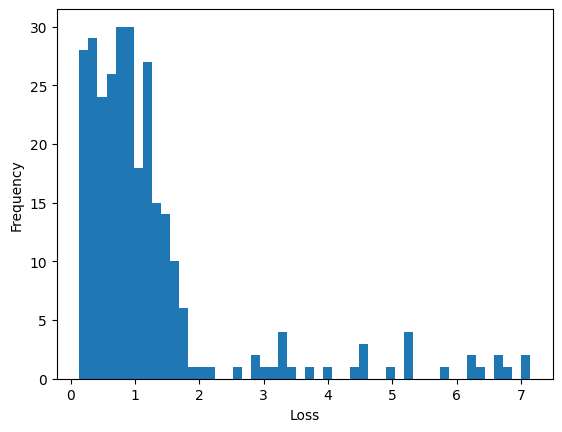

Anomaly threshold: 3.9193027019500732
Anomalies found at positions: [141 142 143 144 146 147 148 149 150 241 242 243 244 245 246 247 248 249
 250]


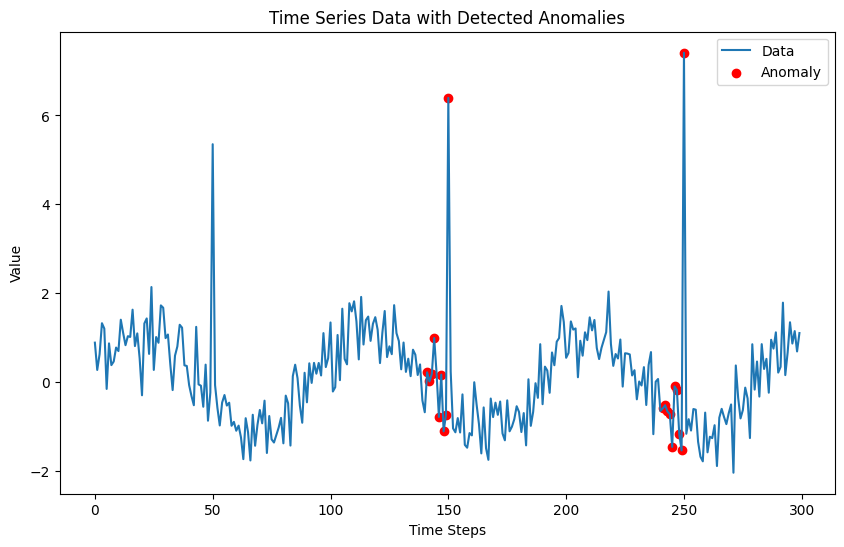

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic time-series data
data_length = 300
data = np.sin(np.linspace(0, 20, data_length)) + np.random.normal(scale=0.5, size=data_length)
# Introduce anomalies
data[50] += 6  # Anomaly 1
data[150] += 7 # Anomaly 2
data[250] += 8 # Anomaly 3

# Function to create sequences
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 10
sequences = create_sequences(data, window_size)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(window_size, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, window_size),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Convert sequences to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(sequences)
    loss = criterion(output, sequences)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Anomaly detection
with torch.no_grad():
    predictions = model(sequences)
    losses = torch.mean((predictions - sequences)**2, dim=1)
    plt.hist(losses.numpy(), bins=50)
    plt.xlabel("Loss")
    plt.ylabel("Frequency")
    plt.show()

# Threshold for defining an anomaly
threshold = losses.mean() + 2 * losses.std()
print(f"Anomaly threshold: {threshold.item()}")

# Detecting anomalies
anomalies = losses > threshold
anomaly_positions = np.where(anomalies.numpy())[0]
print(f"Anomalies found at positions: {np.where(anomalies.numpy())[0]}")

# Plotting anomalies on the time-series graph
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.scatter(anomaly_positions, data[anomaly_positions], color='r', label='Anomaly')
plt.title("Time Series Data with Detected Anomalies")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()
